In [22]:

from typing import TypeVar, Generic, Callable, List, Any, Annotated

# place holder for data types
T = TypeVar(name='T')

# Repository class
class Repository(Generic[T]):
    """
    Description:
    ===========
    The repository class represents the generic container for specific items. 
    The item type is defined at the creation of repository.
    
    Attributes:
    ==========
    items: List[T]: Container for the generic items managed by the repository.
    
    Usage:
    =====
    >>> user_repo = Repository[User]()
    """
        
    def __init__(self):
        """
        Initializes the attribute _items with a List.
        """
        self._items: Annotated[List[T], "Contains media types"] = []

    
    def add (self, item: T) -> None:
        """
        Adds an item to the list.
        
        :param item: The item to be added to the repository.
        :return: None
        """
        self._items.append(item)
        
    def get_all(self) -> List[T]:
        """
        Displays all items in list.
        
        :return: Items
        """
        return self._items
    
    def find(self, condition: Callable) -> List[T]:
        """
        Returns item if condition is true.
        
        :param condition: (lambda b: b.author == "Catboy"):
        :return: List
        """
        return [item for item in self._items if condition(item)]
    
class Book:
    """
    Description:
    ========
    The book class represents the container for the attributes title, author, and isbn.
    
    Attributes:
    ========
    title: str: Container for string
    author: str: Container for string
    isbn: int: Container for integer
    
    Usage:
    ========
    >>> book_repo = Repository[Book]()
    >>> book_repo.add(Book("1984", "George Orwell", 1234567890))
    """

    def __init__(self, title: str, author: str, isbn: int):
        """
        Initializes the three attributes with title, author, and isbn.
        
        :param title: Attribute that will be added to book_repo
        :param author: Attribute that will be added to book_repo
        :param isbn: Attribute that will be added to book_repo
        """
        self.title = title
        self.author = author
        self.isbn = isbn
        
    def __str__(self):
        """
        Returns the three attributes title, author, and isbn.
        
        :return: Items
        """
        return f"Book({self.title}, {self.author}, {self.isbn})"
    
class Magazine:
    def __init__(self, title: str, issue: str, publisher: str):
        """
        Description:
        ============
        Initializes the three attributes with title, issue, and publisher
        
        Attributes:
        ===========
        :param title:  Attribute that will be added to mag_repo
        :param issue: Attribute that will be added to mag_repo
        :param publisher: Attribute that will be added to mag_repo
        
        Usage:
        ======
        >>> mag_repo = Repository[Magazine]()
        >>> mag_repo.add(Magazine("Tech Today", "2023-09-01", "Tech Publishers"))
        """
        self.title = title
        self.issue = issue
        self.publisher = publisher
        
    def __str__(self):
        """
        Returns the three attributes title, issue, and publisher. 
        
        :return: Items
        """
        return f"Magazine({self.title}, {self.issue}, {self.publisher})"
    
class DVD:
    """
    Description:
    ===========
    Represents the container for the three attributes title, director, and duration.
    
    Attributes:
    ==========
    title: Container for string
    director: Container for string
    duration: Container for integer
    
    Usage:
    ======
    >>> DVD_repo = Repository[DVD]()
    >>> DVD_repo.add(DVD("Inception", "Christopher Nolan", 148))
    """

    def __init__(self, title: str, director: str, duration: int):
        """
         Initializes the three attributes with title, director, and duration.
         
        :param title: Attribute that will be added to DVD_repo
        :param director: Attribute that will be added to DVD_repo
        :param duration: Attribute that will be added to DVD_repo
        """
        self.title = title
        self.director = director
        self.duration = duration
        
    def __str__(self):
        """
        Returns the attributes title, director, and duration.
        
        :return: Items
        """
        return f"DVD({self.title}, {self.director}, {self.duration})"
    
# Adds data to each medias respective repos
# Adds data to book repo
book_repo = Repository[Book]()
book_repo.add(Book("1984", "George Orwell", 1234567890))
book_repo.add(Book("The Great Gatsby", "F. Scott Fitzgerald", 9876543210))

# Adds data to magazine repo
mag_repo = Repository[Magazine]()
mag_repo.add(Magazine("Tech Today", "2023-09-01", "Tech Publishers"))
mag_repo.add(Magazine("Fashion Weekly", "2023-08-02", "Style Inc"))

# Adds data to DVD repo
DVD_repo = Repository[DVD]()
DVD_repo.add(DVD("Inception", "Christopher Nolan", 148))
DVD_repo.add(DVD("The Matrix", "The Wachowskis", 136 ))

In [23]:
from abc import ABC
# service class
class Service:
    """
    Description:
    ===========
    Uses a generic repository to manage data and perform operations on them.
    
    Attribute:
    =========
    Repository: Container for repositories.
    
    Usage:
    =====
    >>> book_service = Service(book_repo)
    >>> mag_service = Service(mag_repo)
    >>> DVD_service = Service(DVD_repo)
    """
    
    def __init__(self, repository: Repository):
        """
        Initializes the repository attribute with repository.
        
        :param repository: Contains repository data
        """
        self.repository = repository
        
    def add_items(self, item: T) -> None:
        """
        Adds items to repository.
        
        :param item: 
        :return: None
        """
        self.repository.add(item)
        
    def find_items(self, condition: Callable) -> List[T]:
        """
        Find item if condition is true.
        
        :param condition: 
        :return: List
        """
        return self.repository.find(condition)


# Transfer repository data to the Service class
book_service = Service(book_repo)
mag_service = Service(mag_repo)
DVD_service = Service(DVD_repo)

# Adding additonal data to each media service
book_service.add_items(Book("Catboy", "Tim Alan",4544347 ))
book_service.add_items(Book("Catgirl", "Lily Peach", 154576876))

mag_service.add_items(Magazine("Tornado Game", "2023-10-7", "Weather Inc"))
mag_service.add_items(Magazine("Rain Bane", "2023-09-18", "Weather Works"))

DVD_service.add_items(DVD("Frozen", "Chris Buck", 102))
DVD_service.add_items(DVD("Moana", "John Musker's", 103))

# Displaying the media
for book in book_service.repository.get_all():
    print(book)
for magazine in mag_service.repository.get_all():
    print(magazine)
for dvd in DVD_service.repository.get_all():
    print(dvd)
for item in book_service.find_items(lambda b: b.author == "Catboy"):
    print(item)

Book(1984, George Orwell, 1234567890)
Book(The Great Gatsby, F. Scott Fitzgerald, 9876543210)
Book(Catboy, Tim Alan, 4544347)
Book(Catgirl, Lily Peach, 154576876)
Magazine(Tech Today, 2023-09-01, Tech Publishers)
Magazine(Fashion Weekly, 2023-08-02, Style Inc)
Magazine(Tornado Game, 2023-10-7, Weather Inc)
Magazine(Rain Bane, 2023-09-18, Weather Works)
DVD(Inception, Christopher Nolan, 148)
DVD(The Matrix, The Wachowskis, 136)
DVD(Frozen, Chris Buck, 102)
DVD(Moana, John Musker's, 103)


[2025-02-21 22:19:17][DEBUG][src.utils.mermaid][119]: 
Response status code: 200
[2025-02-21 22:19:17][DEBUG][src.utils.mermaid][125]: 
Output file path: 
/Users/aalexander/SynologyDrive/Repos/MyFirstPythonProject/assets/img/class_dia_1.png


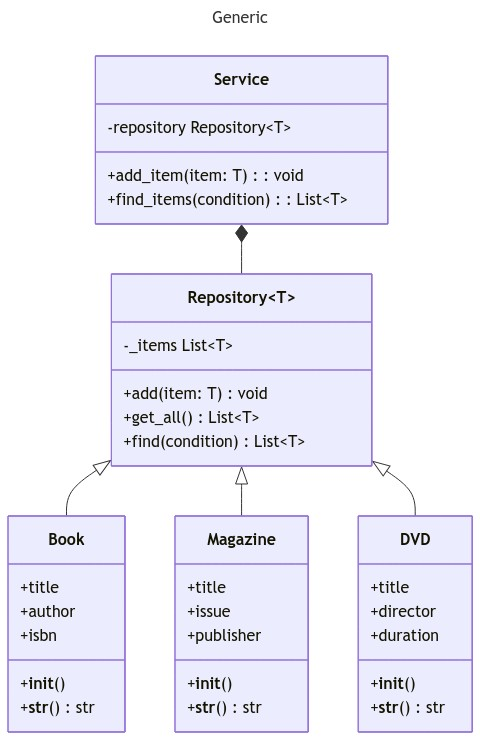

In [2]:
from src.utils.mermaid import mm_save_as_png, display_image_from_file

generic_diagram = """---
title: Generic
---
classDiagram
    class Repository~T~ {
        -_items List~T~ 
        +add(item: T) void
        +get_all() List~T~
        +find(condition) List~T~
    }

    class Service {
        -repository Repository~T~
        +add_item(item: T): void
        +find_items(condition): List~T~
    }

    class Book {
        +title
        +author
        +isbn
        +__init__()
        +__str__() str
    }

    class Magazine {
        +title
        +issue
        +publisher
        +__init__()
        +__str__() str
    }

    class DVD {
        +title
        +director
        +duration
        +__init__()
        +__str__() str
    }
    
    Repository~T~ <|-- Book
    Repository~T~ <|-- Magazine
     Repository~T~ <|-- DVD
    Service~T~ *-- Repository~T~
"""

# Save the mermaid diagram
filepath = mm_save_as_png(
    generic_diagram, "../../assets/img/class_dia_1.png"
)

# Get the mermaid diagram from a file
display_image_from_file('../../assets/img/class_dia_1.png')